In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from utilities import *
from VoxelGrid import *
import os


os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'



d_ims={'chair':40, 'materials':44, 'drums':41, 'lego':70, 'mic':70, 'hotdog':40, 'ship':50, 'ficus':40}

In [31]:
def view(model):
    focal, all_c2w, all_gt = get_data("../nerf_synthetic/"+model, "test")

    disp_ims, disp_rays = reduce_data(all_c2w[d_ims[model]][None,:], all_gt[d_ims[model]][None,:], focal, 1)
    im_ref = disp_ims[0]
    #VG = VoxelGrid()
   # VG.load(model+'.obj')
    #im_vg = VG.render_large_image_from_rays(disp_rays[0],(900,1.2))
    #VG = VoxelGridCarve()
    #VG.load(model+'_carve.obj')
    #im_vgc = VG.render_large_image_from_rays(disp_rays[0],(900,1.2))
    
    VG = VoxelGridSphericalCarve()
    VG.load(model+'_carve.obj')
    im_vgcs = VG.render_large_image_from_rays(disp_rays[0],(900,1.2))
    
    #plt.imsave('exports/comp/'+model+'.png', im_ref)
    #plt.imsave('exports/comp/vg_'+model+'.png', im_vg)
    #plt.imsave('exports/comp/vgc_'+model+'.png', im_vgc)
    plt.imsave('exports/comp/vgcs_'+model+'.png', im_vgcs)

In [32]:
view('ficus')

In [123]:
for model in tqdm(d_ims.keys()):
    try:
        view(model)
    except:
        pass



100%|█████████████████████████████████████████████| 8/8 [01:32<00:00, 11.55s/it]


In [109]:
[e for e in d_ims.keys()]

['chair', 'materials', 'drums', 'lego', 'mic', 'hotdog', 'ship', 'ficus']

In [11]:
focal, all_c2w, all_gt = get_data("../nerf_synthetic/"+"ficus", "test")

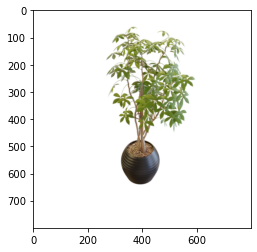

In [33]:
plt.imshow(all_gt[40])

In [35]:
disp_ims, disp_rays = reduce_data(all_c2w, all_gt, focal, 1)

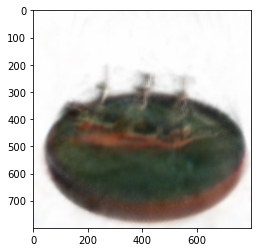

In [93]:
VG = VoxelGrid()
VG.load(model+'.obj')
im_vg = VG.render_large_image_from_rays(disp_rays[0],(900,1.2))
plt.imshow(im_vg)
plt.show()

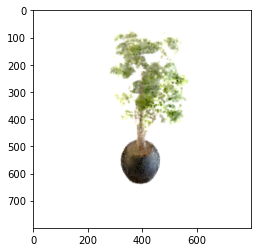

In [39]:
VG = VoxelGridSphericalCarve()
VG.load("ficus"+'_carve.obj')
im_vgc = VG.render_large_image_from_rays(disp_rays[40],(1800,1.2))


plt.imshow(im_vgc)
plt.show()

In [40]:
plt.imsave('exports/comp/vgcs_'+"ficus"+'.png', im_vgc)